In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import time

%matplotlib inline
import hddm
print(hddm.__version__)
import multiprocessing as mp

0.8.0


In [50]:
data = hddm.load_csv('./rt_dataframes/all.csv')
data.head(10)

,subjID,rt,win,trial_type,gain,loss,cert,gamble
0,27902f23b60a7b76,2238.0,1.0,102,14.0,0.0,6.0,1.0
1,27902f23b60a7b76,1924.0,1.0,101,15.0,-5.0,0.0,1.0
2,27902f23b60a7b76,1415.0,0.0,101,13.0,-3.0,0.0,1.0
3,27902f23b60a7b76,2014.0,1.0,102,8.0,0.0,3.0,1.0
4,27902f23b60a7b76,1082.0,1.0,102,12.0,0.0,6.0,1.0
5,27902f23b60a7b76,1223.0,1.0,101,12.0,-3.0,0.0,1.0
6,27902f23b60a7b76,1115.0,0.0,102,14.0,0.0,4.0,1.0
7,27902f23b60a7b76,1124.0,0.0,102,12.0,0.0,3.0,1.0
8,27902f23b60a7b76,1712.0,0.0,101,20.0,-8.0,0.0,1.0
9,27902f23b60a7b76,1345.0,0.0,102,12.0,0.0,4.0,1.0


In [51]:
data = data.rename(columns={'subjID'
: 
'subj_idx',
'gamble':
'response'})
data.head(10)


,subj_idx,rt,win,trial_type,gain,loss,cert,response
0,27902f23b60a7b76,2238.0,1.0,102,14.0,0.0,6.0,1.0
1,27902f23b60a7b76,1924.0,1.0,101,15.0,-5.0,0.0,1.0
2,27902f23b60a7b76,1415.0,0.0,101,13.0,-3.0,0.0,1.0
3,27902f23b60a7b76,2014.0,1.0,102,8.0,0.0,3.0,1.0
4,27902f23b60a7b76,1082.0,1.0,102,12.0,0.0,6.0,1.0
5,27902f23b60a7b76,1223.0,1.0,101,12.0,-3.0,0.0,1.0
6,27902f23b60a7b76,1115.0,0.0,102,14.0,0.0,4.0,1.0
7,27902f23b60a7b76,1124.0,0.0,102,12.0,0.0,3.0,1.0
8,27902f23b60a7b76,1712.0,0.0,101,20.0,-8.0,0.0,1.0
9,27902f23b60a7b76,1345.0,0.0,102,12.0,0.0,4.0,1.0


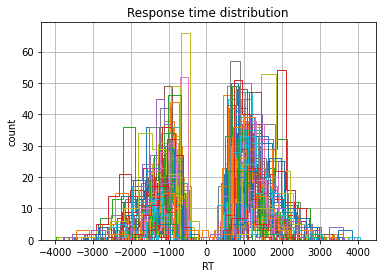

In [52]:
#to flip the error RTs to be negative
data = hddm.utils.flip_errors(data)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='Response time distribution')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
plt.savefig('rt_distribution.png')

In [53]:
models = list()

In [47]:
def fit_hddm_chain(data, chain_num):
    print(f'Fitting chain {chain_num}')
    m = hddm.HDDM(data)
    m.find_starting_values()
    m.sample(50, burn=10, dbname = f'chain_{chain_num}', db='pickle')
    print(f'Finished chain {chain_num}')
    return m
    

In [54]:
num_chains = 4
data_chains = [(data,chain_num) for chain_num in range(num_chains)]

with mp.Pool(processes=num_chains) as pool:
    models = pool.starmap(fit_hddm_chain, data_chains)

for i, model in enumerate(models):
    model.save(f'./chain_{i}')
print('Finished all chains')


Fitting chain 0
Fitting chain 1
Fitting chain 2
Fitting chain 3


/Users/xisunbowen/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/xisunbowen/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/xisunbowen/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/xisunbowen/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/xisunbowen/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/xisunbowen/opt/anaconda

 -----------------62%---               ] 31 of 50 complete in 76.3 sec-                 4%                  ] 2 of 50 complete in 2.1 sec[-                 4%                  ] 2 of 50 complete in 2.2 sec[-                 4%                  ] 2 of 50 complete in 2.2 sec[--                6%                  ] 3 of 50 complete in 4.4 sec[--                6%                  ] 3 of 50 complete in 4.5 sec[--                6%                  ] 3 of 50 complete in 4.5 sec[--                6%                  ] 3 of 50 complete in 4.5 sec[---               8%                  ] 4 of 50 complete in 6.7 sec[---               8%                  ] 4 of 50 complete in 6.8 sec[---               8%                  ] 4 of 50 complete in 6.8 sec[---               8%                  ] 4 of 50 complete in 6.9 sec[---              10%                  ] 5 of 50 complete in 9.0 sec[---              10%                  ] 5 of 50 complete in 9.1 sec[---              10%                  ] 5 of 5

In [56]:
models

In [57]:

results = hddm.analyze.gelman_rubin(models)
print(results)

{'a': 3.5664464663634323, 'a_std': 1.9199219304191033, 'a_subj.00aa64fdcb675341': 1.5200955989733458, 'a_subj.02535fcf7e16bb56': 1.0274240277548181, 'a_subj.06c46b112368babf': 1.1905780051461623, 'a_subj.09ba82a2ca814481': 1.8230827020911469, 'a_subj.0abfc32a4d12c731': 1.172720405872592, 'a_subj.0b0a94c202d0b233': 1.1489533281628346, 'a_subj.0beac20378edac7b': 1.0565492084800914, 'a_subj.0d894551bc966608': 1.1485863776423495, 'a_subj.10d15198ac61a404': 1.1673705251595843, 'a_subj.12a096342c4d052f': 1.107003254173747, 'a_subj.13e347e32a454872': 1.1574021194206028, 'a_subj.15e0c065b2c11595': 1.0866476226302664, 'a_subj.163b12703c8e5c3c': 1.1313822540202998, 'a_subj.1bf86ff948486447': 1.121980890909423, 'a_subj.1cb976bac3a2016b': 1.0956643417381888, 'a_subj.1ffdcfc59b83c43a': 1.1027025907313779, 'a_subj.221e9f16c114b2c0': 1.2794976965244358, 'a_subj.22d84796012679e8': 1.5914298807431815, 'a_subj.247384e4eccc4f80': 1.2105145302208247, 'a_subj.2737c4b829b3018f': 1.1549597088102876, 'a_subj.

In [42]:
import pickle
file_path = './chain_0'
with open(file_path, 'rb') as file :
     data = pickle.load(file)

models.append(data)
models

[{'deviance': {0: array([61661.39585522, 61658.24856111, 61643.39022153, 61639.63582927,
          61652.59016912, 61633.98147378, 61654.94529201, 61648.41650476,
          61665.2463473 , 61634.95354466, 61636.66538641, 61622.7495439 ,
          61643.28996732, 61638.97359809, 61630.77446016, 61632.14714273,
          61634.54285375, 61645.33223558, 61655.20596374, 61643.45394847,
          61640.90919904, 61648.8599204 , 61642.63918208, 61644.95037697,
          61647.85933182, 61629.50799605, 61670.75033494, 61636.81038316,
          61649.02011655, 61635.03869771, 61653.18742887, 61673.14146246,
          61651.83037459, 61628.75081429, 61649.97186206, 61640.49120665,
          61620.09961085, 61643.4536377 , 61621.98283718, 61625.28351378])},
  'a_subj.820fed1432e2cffc': {0: array([0.4940236 , 0.44781688, 0.47717337, 0.87344244, 1.10230242,
          1.06546854, 0.78333081, 0.88393398, 0.81872604, 0.78252583,
          0.75331529, 0.76324175, 0.76342157, 0.43590496, 0.42007646,
  

In [44]:
analysis = hddm.analyze.gelman_rubin(models)
print(analysis)

AttributeError: 'dict' object has no attribute 'get_stochastics'

In [20]:
start_time = time.time()
m = hddm.HDDM(data)
m.find_starting_values()
m.sample(2000, burn=500, dbname='traces.db', db='pickle')
end_time = time.time()
print("MCMC elapsed time:", (end_time - start_time)/60., "minutes")


KeyboardInterrupt: 

In [43]:
stats = m.gen_stats()
stats[stats.index.isin(['a', 'a_std', 'v', 'v_std', 't', 't_std'])]

Could not generate output statistics for a_std
Could not generate output statistics for a
Could not generate output statistics for a_subj.06c46b112368babf
Could not generate output statistics for v_subj.99bca86575635ced
Could not generate output statistics for t_subj.99bca86575635ced
Could not generate output statistics for v_subj.96b09fe2762bafab
Could not generate output statistics for v_subj.9e5ca4f7d45dda1b
Could not generate output statistics for t_subj.9e5ca4f7d45dda1b
Could not generate output statistics for v_subj.6df05dd94d8d774d
Could not generate output statistics for t_subj.6dcbb2d2c8c4d46a
Could not generate output statistics for v_subj.6e0c43d93a4a361e
Could not generate output statistics for t_subj.6df05dd94d8d774d
Could not generate output statistics for v_subj.6ece121c0867568c
Could not generate output statistics for t_subj.6e0c43d93a4a361e
Could not generate output statistics for v_subj.739442e141b9639a
Could not generate output statistics for t_subj.6ece121c0867568c


TypeError: 'NoneType' object is not subscriptable

Plotting a
Plotting a_std
Plotting v
Plotting t


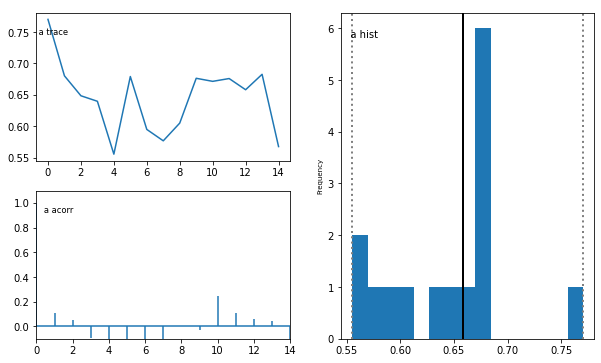

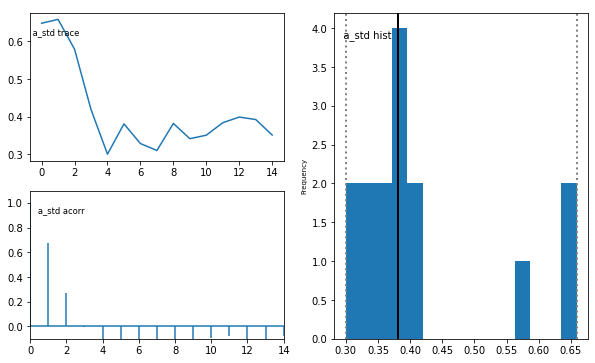

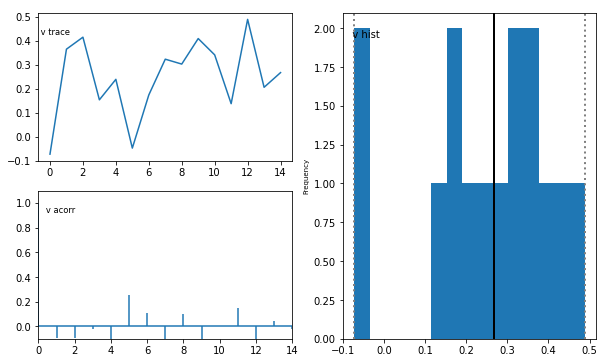

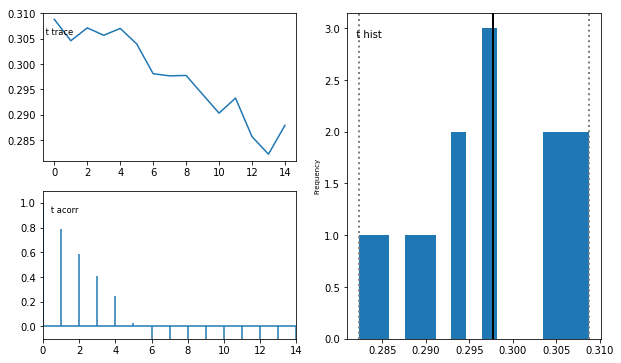

In [20]:
m.plot_posteriors(['a', 't', 'v', 'a_std'])